In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import ks_2samp, mannwhitneyu
from cliffs_delta import cliffs_delta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
saf = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

In [ ]:
SAF_PMD = pd.read_csv("")
SAF_EMD = pd.read_csv("")
SAF_MSSD = pd.read_csv("")
saf = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]

In [4]:
# Dictionary to store results
results = []

# Function to apply Shapiro-Wilk test
def check_normality(df, dataset_name):
    for feature in saf:
        if feature in df.columns:
            stat, p = shapiro(df[feature].dropna())
            results.append({"Dataset": dataset_name, "Feature": feature, "p-value": p, "Normal": p > 0.05})

# Apply normality check
check_normality(SAF_PMD, "PMD")
check_normality(SAF_EMD, "EMD")
check_normality(SAF_MSSD, "MSSD")

# Convert to DataFrame
normality_df = pd.DataFrame(results)
normality_df

,Dataset,Feature,p-value,Normal
0,PMD,Danceability,1.160861e-12,False
1,PMD,Energy,1.371721e-22,False
2,PMD,Loudness,5.131720e-41,False
3,PMD,Speechiness,2.750088e-54,False
4,PMD,Acousticness,1.818867e-39,False
5,PMD,Instrumentalness,6.681843e-59,False
6,PMD,Liveness,7.184642e-49,False
7,PMD,Valence,4.325092e-21,False
8,PMD,Tempo,4.856693e-13,False
9,EMD,Danceability,5.809560e-27,False


In [5]:
# Define dataset pairs for comparisons
comparisons = {
    "PMD vs EMD": (SAF_PMD, SAF_EMD),
    "PMD vs MSSD": (SAF_PMD, SAF_MSSD),
    "MSSD vs EMD": (SAF_MSSD, SAF_EMD)
    }

# Perform statistical tests for each feature and dataset pair
results = {name: [] for name in comparisons}

for feature in saf:
    for name, (df1, df2) in comparisons.items():
        ks_stat, ks_p = ks_2samp(df1[feature], df2[feature])
        mw_stat, mw_p = mannwhitneyu(df1[feature], df2[feature])
        delta, magnitude = cliffs_delta(df1[feature], df2[feature])

        results[name].append({
            "Feature": feature,
            "KS statistic": ks_stat,
            "KS p-value": ks_p,
            "Mann-Whitney U statistic": mw_stat,
            "Mann-Whitney U p-value": mw_p,
            "Cliff's Delta": delta,
            "Effect Size Magnitude": magnitude,
            "KS significant": "Yes" if ks_p < 0.05 else "No",
            "Mann-Whitney significant": "Yes" if mw_p < 0.05 else "No"
        })

# Convert results to DataFrames
dfs = {name: pd.DataFrame(data) for name, data in results.items()}

# Display results in Jupyter Notebook
for name, df in dfs.items():
    print(f"\n### {name} ###")
    display(df)

# Display the results for each dataset pair
# Summary statistics for significant results
for name, df in dfs.items():
    total_features = len(df)
    ks_significant_count = df['KS significant'].value_counts().get('Yes', 0)
    mw_significant_count = df['Mann-Whitney significant'].value_counts().get('Yes', 0)
    effect_size_counts = df['Effect Size Magnitude'].value_counts()

    print(f"\n{name}:")
    print(f"Kolmogorov-Smirnov significant tests: {ks_significant_count} out of {total_features}")
    print(f"Mann-Whitney significant tests: {mw_significant_count} out of {total_features}")
    print("Effect Size Summary:")
    print(effect_size_counts)


### PMD vs EMD ###


,Feature,KS statistic,KS p-value,Mann-Whitney U statistic,Mann-Whitney U p-value,Cliff's Delta,Effect Size Magnitude,KS significant,Mann-Whitney significant
0,Danceability,0.165836,1.194705e-37,6647841.5,2.314431e-45,-0.207429,small,Yes,Yes
1,Energy,0.191362,4.551200e-50,6349193.0,1.329800e-61,-0.243035,small,Yes,Yes
2,Loudness,0.083713,6.908763e-10,7884290.5,4.318739e-05,-0.060017,negligible,Yes,Yes
3,Speechiness,0.049933,8.528320e-04,8793606.0,9.747442e-04,0.048394,negligible,Yes,Yes
4,Acousticness,0.197607,2.196067e-53,10256004.5,4.908114e-52,0.222744,small,Yes,Yes
5,Instrumentalness,0.089069,3.890290e-11,9172404.5,7.800729e-11,0.093555,negligible,Yes,Yes
6,Liveness,0.094124,2.184102e-12,7923064.0,1.601702e-04,-0.055394,negligible,Yes,Yes
7,Valence,0.188133,2.136543e-48,6314682.5,1.210580e-63,-0.247149,small,Yes,Yes
8,Tempo,0.076976,1.998119e-08,8118102.0,2.850952e-02,-0.032141,negligible,Yes,Yes



### PMD vs MSSD ###


,Feature,KS statistic,KS p-value,Mann-Whitney U statistic,Mann-Whitney U p-value,Cliff's Delta,Effect Size Magnitude,KS significant,Mann-Whitney significant
0,Danceability,0.047643,1.502997e-03,9821234.0,6.106232e-04,0.049838,negligible,Yes,Yes
1,Energy,0.031171,9.130636e-02,9496155.0,2.995047e-01,0.015089,negligible,No,No
2,Loudness,0.079525,4.050563e-09,10351900.0,2.348596e-13,0.106563,negligible,Yes,Yes
3,Speechiness,0.120080,2.945980e-20,8101846.5,3.237968e-20,-0.133955,negligible,Yes,Yes
4,Acousticness,0.047626,1.510523e-03,9161868.0,1.557442e-01,-0.020645,negligible,Yes,No
5,Instrumentalness,0.316743,1.211767e-140,7512581.5,8.743629e-42,-0.196945,small,Yes,Yes
6,Liveness,0.086967,8.025391e-11,8331769.0,5.443305e-14,-0.109378,negligible,Yes,Yes
7,Valence,0.041052,9.548469e-03,9633200.0,4.087583e-02,0.029738,negligible,Yes,Yes
8,Tempo,0.040231,1.179346e-02,9489060.0,3.244534e-01,0.014330,negligible,Yes,No



### MSSD vs EMD ###


,Feature,KS statistic,KS p-value,Mann-Whitney U statistic,Mann-Whitney U p-value,Cliff's Delta,Effect Size Magnitude,KS significant,Mann-Whitney significant
0,Danceability,0.207879,3.056139e-179,33474858.0,7.092938e-200,-0.253293,small,Yes,Yes
1,Energy,0.207956,2.245843e-179,33555984.0,4.644685e-197,-0.251484,small,Yes,Yes
2,Loudness,0.137794,1.090863e-78,36976605.5,1.193977e-96,-0.175182,small,Yes,Yes
3,Speechiness,0.134305,9.160403e-75,52800773.0,1.676659e-99,0.177800,small,Yes,Yes
4,Acousticness,0.238980,2.647965e-237,55338463.0,1.775150e-171,0.234407,small,Yes,Yes
5,Instrumentalness,0.344770,0.000000e+00,58089023.5,6.319208e-273,0.295762,small,Yes,Yes
6,Liveness,0.073495,1.186347e-22,47000368.0,8.149034e-09,0.048413,negligible,Yes,Yes
7,Valence,0.200842,2.915857e-167,32846376.0,2.249378e-222,-0.267313,small,Yes,Yes
8,Tempo,0.103350,2.114915e-44,42824646.0,9.984696e-08,-0.044732,negligible,Yes,Yes



PMD vs EMD:
Kolmogorov-Smirnov significant tests: 9 out of 9
Mann-Whitney significant tests: 9 out of 9
Effect Size Summary:
Effect Size Magnitude
negligible    5
small         4
Name: count, dtype: int64

PMD vs MSSD:
Kolmogorov-Smirnov significant tests: 8 out of 9
Mann-Whitney significant tests: 6 out of 9
Effect Size Summary:
Effect Size Magnitude
negligible    8
small         1
Name: count, dtype: int64

MSSD vs EMD:
Kolmogorov-Smirnov significant tests: 9 out of 9
Mann-Whitney significant tests: 9 out of 9
Effect Size Summary:
Effect Size Magnitude
small         7
negligible    2
Name: count, dtype: int64


In [6]:
df_PMD_EMD = dfs["PMD vs EMD"]
df_PMD_MSSD = dfs["PMD vs MSSD"]

In [7]:
# Define the list of features if not already defined
saf = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", 
       "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Define datasets in a dictionary for iteration
datasets = {"PMD": SAF_PMD, "EMD": SAF_EMD, "MSSD": SAF_MSSD}

# Calculate descriptive statistics
descriptive_stats = [
    {
        "Feature": feature,
        "Dataset": dataset,
        "Mean": df[feature].mean(),
        "Median": df[feature].median(),
        "Standard deviation": df[feature].std(),
        # "Skewness": df[feature].skew(),
        # "Kurtosis": df[feature].kurt()
    }
    for dataset, df in datasets.items() for feature in saf
]

# Convert to DataFrame and pivot
descriptive_stats_df = pd.DataFrame(descriptive_stats)
descriptive_stats_pivoted = descriptive_stats_df.pivot(index="Feature", columns="Dataset")

# Flatten the MultiIndex columns for easier reading
descriptive_stats_pivoted.columns = [f"{stat}_{dataset}" for stat, dataset in descriptive_stats_pivoted.columns]
descriptive_stats_pivoted.to_excel("descriptive_stats_pivoted.xlsx")
descriptive_stats_pivoted

,Mean_EMD,Mean_MSSD,Mean_PMD,Median_EMD,Median_MSSD,Median_PMD,Standard deviation_EMD,Standard deviation_MSSD,Standard deviation_PMD
Feature,,,,,,,,,
Acousticness,0.181990,0.356928,0.331296,0.087600,0.231606,0.189000,0.219481,0.348023,0.335479
Danceability,0.632444,0.551014,0.568266,0.646000,0.566886,0.586000,0.142713,0.186186,0.178150
Energy,0.701642,0.581684,0.590896,0.731000,0.617463,0.627000,0.187219,0.265526,0.254385
Instrumentalness,0.052515,0.207817,0.117550,0.000017,0.000217,0.000044,0.172326,0.344035,0.271231
Liveness,0.195461,0.212357,0.174381,0.131000,0.130769,0.117000,0.164519,0.191311,0.146399
Loudness,-7.770184,-9.822645,-8.856651,-7.141000,-8.175500,-7.445000,3.247591,5.941129,5.389704
Speechiness,0.063828,0.102680,0.068155,0.043000,0.049600,0.044200,0.059943,0.136559,0.065585
Tempo,121.581148,119.727575,120.277527,121.054500,119.815002,120.013000,25.333025,30.656997,28.601626
Valence,0.596086,0.470210,0.483367,0.624000,0.457691,0.469000,0.245251,0.272362,0.261558


In [10]:
# # Toggle to enable histograms
# enable_histogram = True  # Set this to False if you don't want to display histograms

# # Define colors for the datasets
# color_EMD = "#86D2EC"  #021A70# light blue for EMD (Everyday Music Dataset)
# color_PMD = "#021A70"  # dark blue for PMD (Pain Music Dataset)

# # Toggle to enable SAF_MSSD plots
# enable_MSSD = True  # Set this to False to exclude SAF_MSSD from the plots

# # Define the orange hex color for MSSD
# color_MSSD = "#FFC145"  # bright orange for MSSD

# # Set up the subplot grid for features
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# axes = axes.flatten()  # Flatten to easily iterate over

# # Plot density (and histogram if enabled) for each feature
# for idx, feature in enumerate(saf):
#     ax = axes[idx]

#     # Retrieve Cliff's Delta values for the current feature
#     cliffs_delta_pmd_emd = round(df_PMD_EMD.loc[df_PMD_EMD["Feature"] == feature, "Cliff's Delta"].values[0], 2)
#     cliffs_delta_pmd_mssd = round(df_PMD_MSSD.loc[df_PMD_MSSD["Feature"] == feature, "Cliff's Delta"].values[0], 2)

#     if enable_MSSD:
#         # Density plot for MSSD dataset
#         density_mssd = SAF_MSSD[feature].plot(kind='density', ax=ax, color=color_MSSD, label='MSSD (10K sample)', linewidth=2)
#         x_vals_mssd = density_mssd.get_lines()[0].get_xdata()
#         y_vals_mssd = density_mssd.get_lines()[0].get_ydata()
#         ax.fill_between(x_vals_mssd, y_vals_mssd, color=color_MSSD, alpha=0.3)

#     # Density plot for EMD dataset
#     density_emd = SAF_EMD[feature].plot(kind='density', ax=ax, color=color_EMD, label='Everyday Music Dataset', linewidth=2)
#     x_vals_emd = density_emd.get_lines()[0 if not enable_MSSD else 1].get_xdata()
#     y_vals_emd = density_emd.get_lines()[0 if not enable_MSSD else 1].get_ydata()
#     ax.fill_between(x_vals_emd, y_vals_emd, color=color_EMD, alpha=0.3)

#     # Density plot for PMD dataset
#     density_pmd = SAF_PMD[feature].plot(kind='density', ax=ax, color=color_PMD, label='Pain Music Dataset', linewidth=2)
#     x_vals_pmd = density_pmd.get_lines()[1 if not enable_MSSD else 2].get_xdata()
#     y_vals_pmd = density_pmd.get_lines()[1 if not enable_MSSD else 2].get_ydata()
#     ax.fill_between(x_vals_pmd, y_vals_pmd, color=color_PMD, alpha=0.3)

#     if enable_histogram:
#         # Calculate the number of bins using Sturges' formula
#         bins_mssd = bins_emd = bins_pmd = None
#         if enable_MSSD:
#             n_mssd = len(SAF_MSSD[feature].dropna())
#             bins_mssd = int(np.ceil(1 + np.log2(n_mssd)))
#             ax.hist(SAF_MSSD[feature].dropna(), bins=bins_mssd, color=color_MSSD, alpha=0.3, density=True, edgecolor="white")
        
#         n_emd = len(SAF_EMD[feature].dropna())
#         bins_emd = int(np.ceil(1 + np.log2(n_emd)))
#         ax.hist(SAF_EMD[feature].dropna(), bins=bins_emd, color=color_EMD, alpha=0.3, density=True, edgecolor="white")

#         n_pmd = len(SAF_PMD[feature].dropna())
#         bins_pmd = int(np.ceil(1 + np.log2(n_pmd)))
#         ax.hist(SAF_PMD[feature].dropna(), bins=bins_pmd, color=color_PMD, alpha=0.3, density=True, edgecolor="white")

#     # Set titles and labels, including Cliff's Delta values
#     ax.set_title(f'C$_{{PMD-EMD}}$ = {cliffs_delta_pmd_emd}, C$_{{PMD-MSSD}}$ = {cliffs_delta_pmd_mssd}', fontsize=10)
#     ax.set_xlabel(feature, fontsize=12)
#     ax.set_ylabel('Density', fontsize=12)

#     # Add legend to each subplot
#     if feature in ["Speechiness", "Acousticness", "Instrumentalness", "Liveness"]:
#         ax.legend(loc='upper right', fontsize=6)  # Move legend to upper right
#     else:
#         ax.legend(loc='upper left', fontsize=6)  # Default location

#     # Set y-label position for consistent alignment
#     ax.yaxis.set_label_coords(-0.24, 0.5)

# # Remove unused subplots if there are any
# for j in range(len(saf), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout and show plot
# plt.tight_layout()
# plt.savefig("/home/jellek23/MAMxAI/scripts/analysis_final/plots_final/PMD_EMD_audio_features.png", dpi=1200)
# plt.savefig("/home/jellek23/MAMxAI/scripts/analysis_final/plots_final/PMD_EMD_audio_features.svg", dpi=1200)
# plt.show()

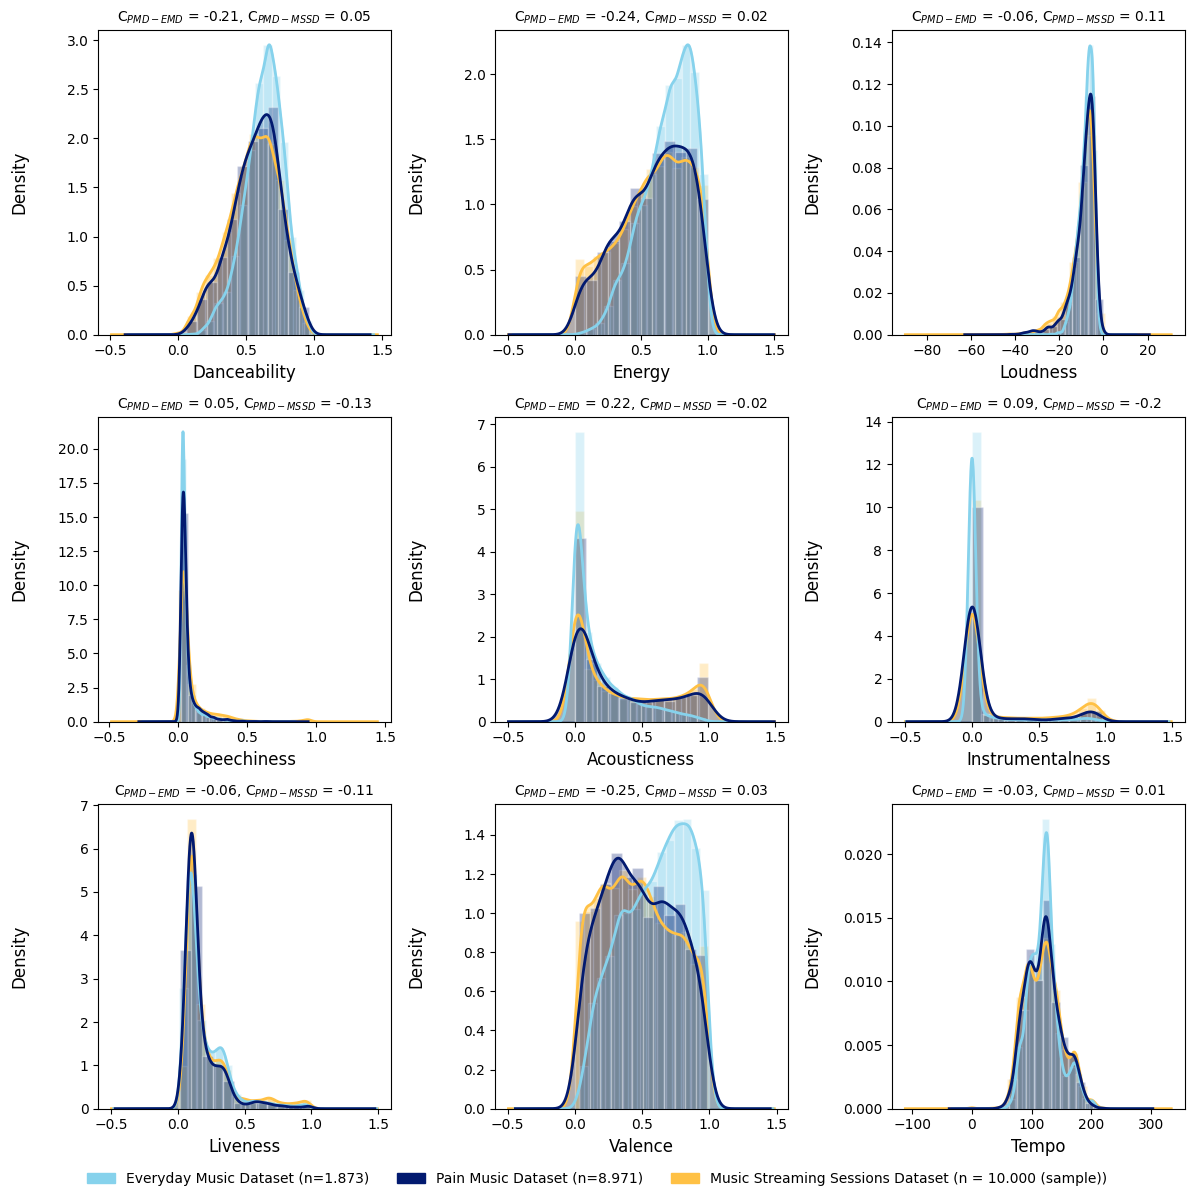

In [ ]:
# Toggle to enable histograms
enable_histogram = True  # Set this to False if you don't want to display histograms

# Define colors for the datasets
color_EMD = "#86D2EC"  # light blue for EMD (Everyday Music Dataset)
color_PMD = "#021A70"  # dark blue for PMD (Pain Music Dataset)
color_MSSD = "#FFC145"  # bright orange for MSSD

# Toggle to enable SAF_MSSD plots
enable_MSSD = True  # Set this to False to exclude SAF_MSSD from the plots

# Set up the subplot grid for features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot density (and histogram if enabled) for each feature
for idx, feature in enumerate(saf):
    ax = axes[idx]

    # Retrieve Cliff's Delta values for the current feature
    cliffs_delta_pmd_emd = round(df_PMD_EMD.loc[df_PMD_EMD["Feature"] == feature, "Cliff's Delta"].values[0], 2)
    cliffs_delta_pmd_mssd = round(df_PMD_MSSD.loc[df_PMD_MSSD["Feature"] == feature, "Cliff's Delta"].values[0], 2)

    if enable_MSSD:
        density_mssd = SAF_MSSD[feature].plot(kind='density', ax=ax, color=color_MSSD, linewidth=2)
        x_vals_mssd = density_mssd.get_lines()[0].get_xdata()
        y_vals_mssd = density_mssd.get_lines()[0].get_ydata()
        ax.fill_between(x_vals_mssd, y_vals_mssd, color=color_MSSD, alpha=0.3)

    density_emd = SAF_EMD[feature].plot(kind='density', ax=ax, color=color_EMD, linewidth=2)
    x_vals_emd = density_emd.get_lines()[0 if not enable_MSSD else 1].get_xdata()
    y_vals_emd = density_emd.get_lines()[0 if not enable_MSSD else 1].get_ydata()
    ax.fill_between(x_vals_emd, y_vals_emd, color=color_EMD, alpha=0.3)

    density_pmd = SAF_PMD[feature].plot(kind='density', ax=ax, color=color_PMD, linewidth=2)
    x_vals_pmd = density_pmd.get_lines()[1 if not enable_MSSD else 2].get_xdata()
    y_vals_pmd = density_pmd.get_lines()[1 if not enable_MSSD else 2].get_ydata()
    ax.fill_between(x_vals_pmd, y_vals_pmd, color=color_PMD, alpha=0.3)

    if enable_histogram:
        bins_mssd = bins_emd = bins_pmd = None
        if enable_MSSD:
            n_mssd = len(SAF_MSSD[feature].dropna())
            bins_mssd = int(np.ceil(1 + np.log2(n_mssd)))
            ax.hist(SAF_MSSD[feature].dropna(), bins=bins_mssd, color=color_MSSD, alpha=0.3, density=True, edgecolor="white")
        
        n_emd = len(SAF_EMD[feature].dropna())
        bins_emd = int(np.ceil(1 + np.log2(n_emd)))
        ax.hist(SAF_EMD[feature].dropna(), bins=bins_emd, color=color_EMD, alpha=0.3, density=True, edgecolor="white")

        n_pmd = len(SAF_PMD[feature].dropna())
        bins_pmd = int(np.ceil(1 + np.log2(n_pmd)))
        ax.hist(SAF_PMD[feature].dropna(), bins=bins_pmd, color=color_PMD, alpha=0.3, density=True, edgecolor="white")

    # Set titles and labels, including Cliff's Delta values
    ax.set_title(f'C$_{{PMD-EMD}}$ = {cliffs_delta_pmd_emd}, C$_{{PMD-MSSD}}$ = {cliffs_delta_pmd_mssd}', fontsize=10)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    
    # Remove individual subplot legends
    ax.legend().remove()

    ax.yaxis.set_label_coords(-0.24, 0.5)

# Remove unused subplots if there are any
for j in range(len(saf), len(axes)):
    fig.delaxes(axes[j])

# Create a single legend below the plot
handles = [
    mpatches.Patch(color=color_EMD, label='Everyday Music Dataset (n=1.873)'),
    mpatches.Patch(color=color_PMD, label='Pain Music Dataset (n=8.971)')
]
if enable_MSSD:
    handles.append(mpatches.Patch(color=color_MSSD, label='Music Streaming Sessions Dataset (n = 10.000 (sample))'))

# Add the global legend
fig.legend(
    handles=handles, 
    loc='lower center', 
    ncol=3,  # Adjust depending on the number of items
    fontsize=10, 
    frameon=False
)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.02, 1, 1])  # Leave space for legend at the bottom
plt.show()

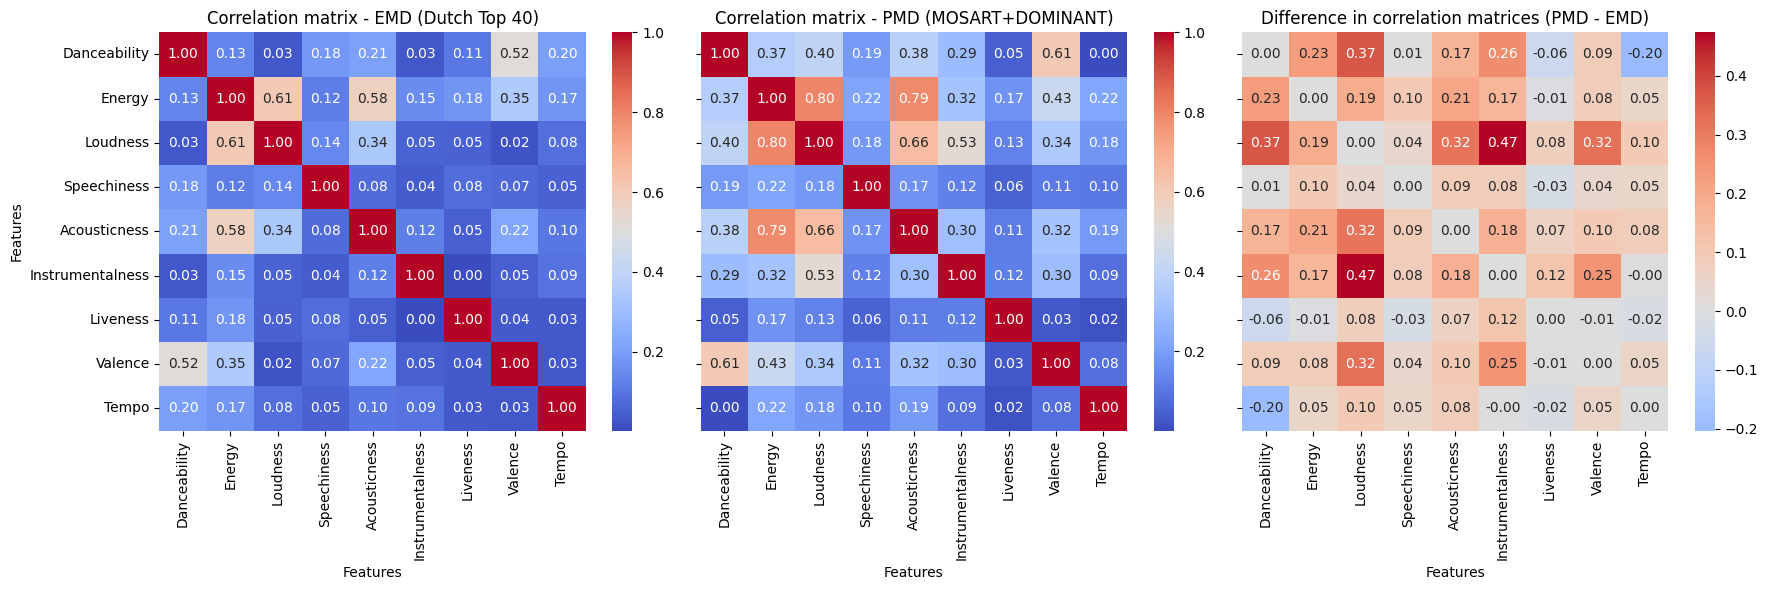

In [12]:
# Filter the datasets to include only relevant features
SAF_PMD = SAF_PMD[saf]
SAF_EMD = SAF_EMD[saf]

# Compute correlation matrices and take absolute values
emd_corr_matrix = SAF_EMD.corr().abs()
pmd_corr_matrix = SAF_PMD.corr().abs()

# Compute the absolute difference matrix
corr_diff_matrix = pmd_corr_matrix - emd_corr_matrix

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot correlation matrix for EMD
sns.heatmap(emd_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, ax=axes[0])
axes[0].set_title("Correlation matrix - EMD (Dutch Top 40)")
axes[0].set_ylabel("Features")
axes[0].set_xlabel("Features")

# Plot correlation matrix for PMD
sns.heatmap(pmd_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, ax=axes[1])
axes[1].set_title("Correlation matrix - PMD (MOSART+DOMINANT)")
axes[1].set_xlabel("Features")

# Plot difference matrix
sns.heatmap(corr_diff_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, center=0, ax=axes[2])
axes[2].set_title("Difference in correlation matrices (PMD - EMD)")
axes[2].set_xlabel("Features")

# Adjust layout
plt.tight_layout()
plt.show()